In [1]:
"""
Creating a scatterplot for the data gathered via pandas:
"""
import matplotlib.pyplot as plt
import datetime
import pandas as pd 
from collections import defaultdict
import numpy as np

data = pd.read_csv('data/file_rootbeer.csv',on_bad_lines='skip')

In [2]:
del data[data.columns[0]] #Remove extra padding 
#Rename files (not needed)
data.columns = [x for x in range(1,len(data.columns)+1)]
#print(data.columns)

In [3]:
#Determine week_0
week_0 = datetime.datetime(2023,1,1)
for filename in data:
    for contributor in data[filename]:
        if(pd.isna(contributor)):
            continue
        author,date = eval(contributor)
        date = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ")
        if((date-week_0).total_seconds() < 0):
            week_0 = date


#Convert datetime to weeks (after subtracting datetimes)
#print(interval.total_seconds()/360/24/7.0)

"""
X-axis: Number of files
Y-axis: Collect timespan by subtracting week_0 and dividing by 7.0
Graphs are separated by author
"""
num_of_files = len(data.columns)
x = np.arange(1,num_of_files+1)#x-axis
y = [[] for i in range(num_of_files)]
tokenizer = 0
author_dict ={}
#author_contributions = defaultdict()
for row, filename in enumerate(data):
    new_row = [] 
    for contributor in data[filename]:
        if(pd.isna(contributor)):
            break
        author, date = eval(contributor)
        if(author not in author_dict):
            author_dict[author] = tokenizer
            tokenizer += 1
        
        date = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ")
        time_diff = date-week_0
        new_row.append((time_diff.total_seconds()/360/24/7.0,author_dict[author]))
    y[row].extend(new_row)

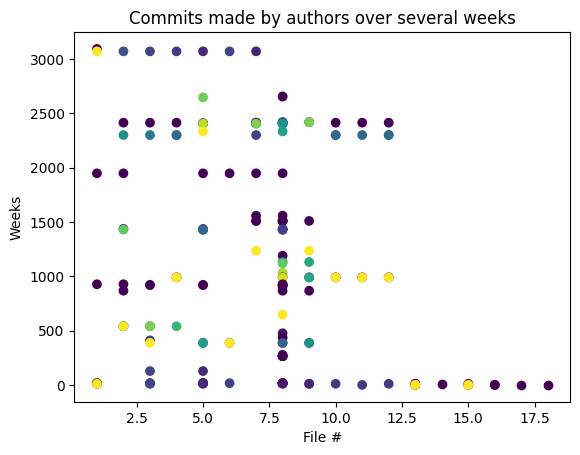

In [11]:
#Graphing:
for index in x:
    x_plt = [index]*len(y[index-1])
    plt.scatter(x_plt,[y_data[0] for y_data in y[index-1]],c=
                [y_auth[1] for y_auth in y[index-1]])
plt.xlabel("File #")
plt.ylabel("Weeks")
plt.title("Commits made by authors over several weeks")
plt.show()